# Checking glimpse videos

In [4]:
import os
import imageio
import numpy as np
import napari
import glob
from tqdm.auto import tqdm
import json
import matplotlib.pyplot as plt

# Load dictionary and mp4 fn info

In [3]:
# Set the base directory where the mp4 files are located
base_directory = "/mnt/DATA/macrohet/results/glimpses/fast_grower_area_smoothed_graph/"

# Get a list of all mp4 file paths in the base directory using glob
mp4_fns = glob.glob(f'{base_directory}/*/*/*.mp4')

# Load dictionary to store the classifications
with open('fast_grower_area_smoothed_graph_truth_dict.json', 'r') as file:
        classifications = json.load(file)

# Check previous classifications

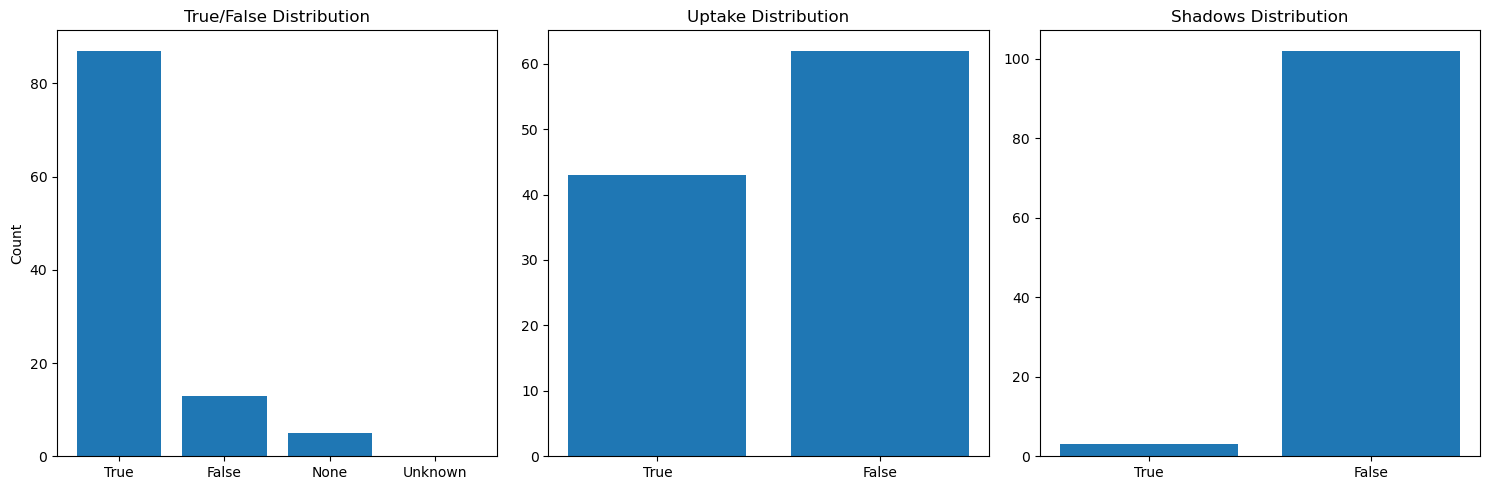

In [14]:
# Initialize counters
true_false_counts = {'True': 0, 'False': 0, 'None': 0, 'Unknown': 0}
uptake_counts = {'True': 0, 'False': 0}
shadows_counts = {'True': 0, 'False': 0}

# Count classifications
for cell in classifications.values():
    true_false_value = cell['True/False']
    if true_false_value is None:
        true_false_counts['None'] += 1
    else:
        true_false_counts[str(true_false_value)] += 1
    uptake_counts[str(cell['Uptake'])] += 1
    shadows_counts[str(cell['Shadows'])] += 1

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(true_false_counts.keys(), true_false_counts.values())
axes[0].set_title('True/False Distribution')
axes[0].set_ylabel('Count')

axes[1].bar(uptake_counts.keys(), uptake_counts.values())
axes[1].set_title('Uptake Distribution')

axes[2].bar(shadows_counts.keys(), shadows_counts.values())
axes[2].set_title('Shadows Distribution')

plt.tight_layout()
plt.show()

# Conduct more classifications

In [ ]:
# Loop through each mp4 file
for fn in tqdm(mp4_fns, total=len(mp4_fns)):
    # cell ID 
    unique_cell_ID = fn.split('/')[-2]

    # check if already checked
    if unique_cell_ID in classifications.keys():
        continue
    
    # Get an imageio reader for the current mp4 file
    reader = imageio.get_reader(fn)

    # Initialize classification dictionary for each cell
    classifications[unique_cell_ID] = {'True/False': None, 'Uptake': False, 'Shadows': False}

    # Print a message to indicate loading images
    print(f'Loading images for {unique_cell_ID}')
    
    # Read all frames from the reader and stack them into a numpy array
    images = np.stack([frame for frame in reader], axis=0)
    
    # Create a napari viewer with the title as the base filename of the current mp4 file
    viewer = napari.Viewer(title=os.path.basename(fn))
    
    # Add the image array to the viewer, with channel axis as -1 and colormap ['red', 'green', 'blue']
    viewer.add_image(images, channel_axis=-1, colormap=['red', 'green', 'blue'])
    
    # Set the current step of the viewer to (0, 0)
    viewer.dims.current_step = (0, 0)
    
    # Define a keyboard binding for the 't' key that classifies the current mp4 file as True
    @viewer.bind_key('t', overwrite=True)
    def classify_true(viewer):
        classifications[unique_cell_ID]['True/False'] = True
        print(f"{os.path.basename(fn)} classified as True")
    
    # Define a keyboard binding for the 'f' key that classifies the current mp4 file as False
    @viewer.bind_key('f', overwrite=True)
    def classify_false(viewer):
        classifications[unique_cell_ID]['True/False'] = False
        print(f"{os.path.basename(fn)} classified as False")
    
    # Define a keyboard binding for the 'u' key that classifies the current mp4 file as Unknown
    @viewer.bind_key('x', overwrite=True)
    def classify_unknown(viewer):
        classifications[unique_cell_ID]['True/False'] = 'Unknown'
        print(f"{os.path.basename(fn)} classified as Unknown")

    @viewer.bind_key('u', overwrite=True)
    def classify_uptake(viewer):
        classifications[unique_cell_ID]['Uptake'] = True
        print(f"{os.path.basename(fn)} classified as having Uptake")

    # Define a keyboard binding for classifying 'Shadows'
    @viewer.bind_key('s', overwrite=True)
    def classify_shadows(viewer):
        classifications[unique_cell_ID]['Shadows'] = True
        print(f"{os.path.basename(fn)} classified as having Shadows")

    # Show the napari viewer and block the execution until the viewer is closed
    viewer.show(block=True)
    
    # Save the classifications dictionary as a JSON file
    with open('fast_grower_area_smoothed_graph_truth_dict.json', 'w') as file:
        json.dump(classifications, file)

    print(classifications)

  0%|          | 0/280 [00:00<?, ?it/s]

Loading images for 587.5.7
ID_587.5.7_dt_30_outlying_growth_glimpse_graph.mp4 classified as True
ID_587.5.7_dt_30_outlying_growth_glimpse_graph.mp4 classified as having Shadows
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}}
Loading images for 749.5.7


ID_749.5.7_outlying_growth_glimpse_graph.mp4 classified as True
ID_749.5.7_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}}
Loading images for 598.5.7


ID_598.5.7_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}}
Loading images for 261.3.9


ID_261.3.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}}
Loading images for 630.3.9


ID_630.3.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_630.3.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}}
Loading images for 593.3.9


ID_593.3.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_593.3.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}}
Loading images for 264.3.9


ID_264.3.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}}
Loading images for 242.3.9


ID_242.3.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_242.3.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}}
Loading images for 504.3.9


ID_504.3.9_outlying_growth_glimpse_graph.mp4 classified as having Shadows
ID_504.3.9_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}}
Loading images for 209.3.9


ID_209.3.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_209.3.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}}
Loading images for 385.3.9


ID_385.3.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}}
Loading images for 650.6.9


ID_650.6.9_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}}
Loading images for 240.5.9


ID_240.5.9_dt_21_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}}
Loading images for 537.4.6


ID_537.4.6_dt_3_outlying_growth_glimpse_graph.mp4 classified as True
ID_537.4.6_dt_3_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_336.4.6_outlying_growth_glimpse_graph.mp4 classified as True
ID_336.4.6_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_363.4.6_outlying_growth_glimpse_graph.mp4 classified as True
ID_363.4.6_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_181.4.6_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadow

ID_264.4.6_dt_51_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_97.4.6_outlying_growth_glimpse_graph.mp4 classified as True
ID_97.4.6_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Sha

ID_349.4.6_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadow

ID_610.4.6_outlying_growth_glimpse_graph.mp4 classified as True
ID_610.4.6_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_318.4.6_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_128.5.5_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadow

ID_2.5.5_dt_9_outlying_growth_glimpse_graph.mp4 classified as True
ID_2.5.5_dt_9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
ID_2.5.5_dt_9_outlying_growth_glimpse_graph.mp4 classified as having Shadows
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Upt

ID_531.5.5_dt_43_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, '

ID_381.5.5_dt_7_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_652.5.5_dt_27_outlying_growth_glimpse_graph.mp4 classified as True
ID_652.5.5_dt_27_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_525.5.5_dt_20_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, '

ID_304.5.5_dt_27_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_577.5.5_dt_9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Sh

ID_35.5.5_dt_17_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Sh

ID_291.5.5_dt_25_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_211.5.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_211.5.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_387.5.5_dt_1_outlying_growth_glimpse_graph.mp4 classified as True
ID_387.5.5_dt_1_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_739.5.5_dt_25_outlying_growth_glimpse_graph.mp4 classified as True
ID_739.5.5_dt_25_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_258.5.5_dt_11_outlying_growth_glimpse_graph.mp4 classified as True
ID_258.5.5_dt_11_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_452.5.5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_133.5.5_dt_19_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_502.5.5_dt_21_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_376.5.5_dt_17_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_261.5.5_dt_10_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_952.5.5_dt_16_outlying_growth_glimpse_graph.mp4 classified as True
ID_952.5.5_dt_16_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

ID_777.5.5_dt_44_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_639.5.5_dt_31_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_849.5.5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_95.5.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_95.5.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Sha

ID_548.5.5_dt_17_outlying_growth_glimpse_graph.mp4 classified as True
ID_548.5.5_dt_17_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_477.5.5_dt_19_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_467.5.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_467.5.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_76.5.5_dt_7_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Sha

ID_677.5.5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_302.5.5_dt_3_outlying_growth_glimpse_graph.mp4 classified as True
ID_302.5.5_dt_3_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_624.5.5_dt_28_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_67.5.5_dt_2_outlying_growth_glimpse_graph.mp4 classified as True
ID_67.5.5_dt_2_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': F

ID_299.5.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as True
ID_299.5.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_8.5.5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows':

ID_619.5.5_dt_25_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_907.5.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

ID_664.5.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_664.5.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_149.5.5_dt_2_outlying_growth_glimpse_graph.mp4 classified as True
ID_149.5.5_dt_2_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_506.5.5_dt_22_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

ID_233.5.5_dt_28_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_50.5.5_dt_15_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Sh

ID_509.5.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_509.5.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_603.5.5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_360.5.5_dt_1_outlying_growth_glimpse_graph.mp4 classified as True
ID_360.5.5_dt_1_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake':

ID_664.3.4_outlying_growth_glimpse_graph.mp4 classified as True
ID_664.3.4_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_719.3.4_outlying_growth_glimpse_graph.mp4 classified as True
ID_719.3.4_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_345.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_345.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_237.4.9_dt_18_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_487.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_487.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_303.4.9_dt_15_outlying_growth_glimpse_graph.mp4 classified as True
ID_303.4.9_dt_15_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_504.4.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_232.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_232.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_464.4.9_dt_5_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Sh

ID_1.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_1.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shado

ID_179.4.9_dt_24_outlying_growth_glimpse_graph.mp4 classified as True
ID_179.4.9_dt_24_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake

ID_400.4.9_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadow

ID_342.4.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_131.4.9_dt_56_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_48.4.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows'

ID_381.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_381.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_323.4.9_outlying_growth_glimpse_graph.mp4 classified as True
ID_323.4.9_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_377.4.9_dt_36_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_872.4.9_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_440.5.8_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_463.5.8_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_549.5.8_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_99.5.8_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows'

ID_840.6.8_dt_17_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_577.6.8_outlying_growth_glimpse_graph.mp4 classified as True
ID_577.6.8_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_767.6.8_dt_8_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_120.5.4_dt_45_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_707.5.4_dt_2_outlying_growth_glimpse_graph.mp4 classified as False
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_488.4.7_outlying_growth_glimpse_graph.mp4 classified as True
ID_488.4.7_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_4.4.7_dt_1_outlying_growth_glimpse_graph.mp4 classified as True
ID_4.4.7_dt_1_outlying_growth_glimpse_graph.mp4 classified as having Uptake
ID_4.4.7_dt_1_outlying_growth_glimpse_graph.mp4 classified as True
ID_4.4.7_dt_1_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake

ID_615.4.7_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_101.4.7_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows

ID_543.4.5_dt_25_outlying_growth_glimpse_graph.mp4 classified as True
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'S

ID_904.4.5_outlying_growth_glimpse_graph.mp4 classified as True
ID_904.4.5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'S

ID_327.4.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as True
ID_327.4.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as True
ID_327.4.5_dt_5_outlying_growth_glimpse_graph.mp4 classified as having Uptake
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake'